In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('airplane_labeled.csv')

In [3]:
df=df.dropna()
df

,Unnamed: 0,tweet,sentiment
0,0,['during a demonstration flight a us army flye...,LABEL_0
1,1,during a demonstration flight a us army flyer ...,LABEL_0
2,2,first us dirigible akron exploded just offshor...,LABEL_0
3,3,the first fatal airplane accident in canada oc...,LABEL_0
4,4,the airship flew into a thunderstorm and encou...,LABEL_0
...,...,...,...
5264,5264,while on approach the military transport crash...,LABEL_0
5265,5265,the cargo plane crashed while on approach to i...,LABEL_0
5266,5266,the airbus went missing over the atlantiocean ...,LABEL_0
5267,5267,the air ambulance crashed into hills while att...,LABEL_0


In [4]:
df=df.replace({'sentiment':{'LABEL_2':2,'LABEL_0':0,'LABEL_1':1}})
df

,Unnamed: 0,tweet,sentiment
0,0,['during a demonstration flight a us army flye...,0
1,1,during a demonstration flight a us army flyer ...,0
2,2,first us dirigible akron exploded just offshor...,0
3,3,the first fatal airplane accident in canada oc...,0
4,4,the airship flew into a thunderstorm and encou...,0
...,...,...,...
5264,5264,while on approach the military transport crash...,0
5265,5265,the cargo plane crashed while on approach to i...,0
5266,5266,the airbus went missing over the atlantiocean ...,0
5267,5267,the air ambulance crashed into hills while att...,0


In [5]:
from sklearn.model_selection import train_test_split
tweet_text=df['tweet'].values
labels=df['sentiment'].values
train_data,test_data,y_train,y_test=train_test_split(tweet_text,
labels,
test_size=0.33,
random_state=1000)

In [6]:
print('train set and train labels:',train_data.shape,y_train.shape)
print('test set and test labels:',test_data.shape,y_test.shape)

train set and train labels: (3268,) (3268,)
test set and test labels: (1611,) (1611,)


In [7]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
train_all_data=list()
lines=train_data.tolist()

for line in lines:
    tokens=word_tokenize(line)
    tokens=[w.lower() for w in tokens]
    table=str.maketrans('','',string.punctuation)
    stripped=[w.translate(table) for w in tokens]
    words=[word for word in stripped if word.isalpha()]
    stop_words=set(stopwords.words('english'))
    words=[w for w in words if not w in stop_words]
    train_all_data.append(words)

In [8]:
train_all_data[0]

['lost', 'engine', 'takeoff', 'crashed', 'trees', 'caught', 'fire']

In [9]:
import gensim
embedding_dim=50
model=gensim.models.Word2Vec(sentences=train_all_data,
vector_size=embedding_dim,
window=5,
workers=4,
min_count=1)
words=len(model.wv)
print('vocabluary size: %d' %(words))

vocabluary size: 9240


In [10]:
model.wv.most_similar('air')

[('wings', 0.9995191693305969),
 ('killed', 0.9994615912437439),
 ('later', 0.9994392395019531),
 ('fighter', 0.9993947148323059),
 ('helicopter', 0.9993935823440552),
 ('passengers', 0.9993439316749573),
 ('island', 0.9993396401405334),
 ('us', 0.9993122220039368),
 ('new', 0.9992895126342773),
 ('de', 0.9992612600326538)]

In [11]:
from keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_data)
X_train=tokenizer.texts_to_sequences(train_data)
X_test=tokenizer.texts_to_sequences(test_data)

word_index=tokenizer.word_index
print('unique tokens:%d' %len(word_index))

unique tokens:11599


In [12]:
X_train

[[62, 15, 24, 13, 41, 3, 7, 8, 81, 3, 155, 51],
 [1,
  9,
  7,
  8,
  15,
  1085,
  1847,
  87,
  12,
  1054,
  5,
  171,
  15,
  80,
  31,
  27,
  15,
  24,
  4920,
  4921,
  76,
  315,
  320,
  13,
  2445],
 [2,
  248,
  144,
  294,
  237,
  2,
  586,
  50,
  5,
  44,
  16,
  2239,
  3,
  2,
  779,
  16,
  4922,
  52,
  107,
  4923,
  1579,
  1,
  779,
  47,
  3,
  3442,
  1,
  644,
  3,
  553,
  567,
  21,
  1,
  586,
  1,
  779,
  460,
  8,
  15,
  2684,
  4262,
  1,
  586,
  7,
  8,
  2,
  944,
  1580,
  1176,
  1744,
  3,
  1581,
  889,
  1745,
  4924,
  13,
  1,
  586,
  210,
  13,
  1,
  372,
  3,
  259,
  13,
  1,
  46,
  34,
  77,
  1,
  20,
  4,
  1,
  779,
  733,
  221,
  1,
  2239,
  1225,
  43,
  87,
  1,
  412,
  3,
  1947,
  2240,
  4,
  1,
  3443,
  8,
  1,
  868,
  1055,
  1225,
  43,
  87,
  1,
  1086,
  4,
  1,
  386,
  3,
  246,
  3444,
  5,
  996,
  4925,
  168,
  1,
  49,
  4,
  1,
  4263],
 [14,
  13,
  23,
  5,
  44,
  16,
  4926,
  3066,
  4927,
  36,
  1,
  9

In [13]:
print(train_data[0])
print(X_train[0])

lost an engine on takeoff and crashed into trees and caught fire
[62, 15, 24, 13, 41, 3, 7, 8, 81, 3, 155, 51]


In [14]:
from keras.preprocessing.sequence import pad_sequences

maxlen=100
print('maxlen:',maxlen)

X_train=pad_sequences(X_train,padding='post',maxlen=100)
X_test=pad_sequences(X_test,padding='post',maxlen=100)
print('training data:',X_train.shape)
print('test data:',X_test.shape)

maxlen: 100
training data: (3268, 100)
test data: (1611, 100)


In [15]:
import tensorflow as tf
import keras 
import keras.utils
from tensorflow.keras.utils import to_categorical
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [26]:
from keras.models import Sequential
from keras.layers import *
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.layers import LSTM
from keras.layers import Dropout
num_words=len(word_index)+1
model=Sequential()
model.add(Embedding(num_words,
embedding_dim,
input_length=100,
))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           580000    
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 610,112
Trainable params: 610,112
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [28]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
103/103 [==============================] - 8s 49ms/step - loss: 0.6009 - accuracy: 0.7442 - val_loss: 0.5513 - val_accuracy: 0.7610
Epoch 2/20
103/103 [==============================] - 4s 42ms/step - loss: 0.5712 - accuracy: 0.7491 - val_loss: 0.5508 - val_accuracy: 0.7610
Epoch 3/20
103/103 [==============================] - 4s 41ms/step - loss: 0.5695 - accuracy: 0.7491 - val_loss: 0.5554 - val_accuracy: 0.7610
Epoch 4/20
103/103 [==============================] - 4s 42ms/step - loss: 0.5657 - accuracy: 0.7491 - val_loss: 0.5564 - val_accuracy: 0.7610
Epoch 5/20
103/103 [==============================] - 4s 41ms/step - loss: 0.5646 - accuracy: 0.7491 - val_loss: 0.5484 - val_accuracy: 0.7610
Epoch 6/20
103/103 [==============================] - 4s 41ms/step - loss: 0.5573 - accuracy: 0.7491 - val_loss: 0.5464 - val_accuracy: 0.7610
Epoch 7/20
103/103 [==============================] - 4s 41ms/step - loss: 0.5170 - accuracy: 0.7549 - val_loss: 0.4270 - val_accuracy: 0.8330

In [29]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy= model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9954
Testing Accuracy: 0.8454


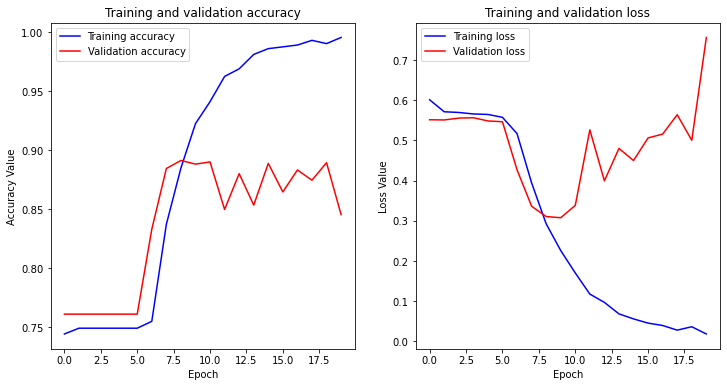

In [30]:
import matplotlib.pyplot as plt

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(acc, 'b', label='Training accuracy')
plt.plot (val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel ('Loss Value')
plt.title('Training and validation loss')
plt.legend()
plt.show()